## <ins> First Practice Session: KHOUTAIBI Iliass / Madani Alaoui Yassine </ins>
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
- White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ 
- $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ 

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.


### <ins>Solutions :</ins>

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$. 
    - For the random variable White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ :

    We find that $\forall n \in \mathbf{N}$ :  

    $\qquad$ $\mathbb{E}[X_{n}]  = 0$  

    And $\forall h \in \mathbf{N}$ :  

    $\qquad$ $\mathrm{Cov}(X_{n},X_{n+h})$ = $\sigma^{2}\cdot\mathbb{1}_{h=0}$ 

    - For the random variable defined as : $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$, we find: 

    $\qquad$ We find that $\mathbb{E}{[X_{n}]} = a$  

    $\qquad$ $\forall h \in \mathbf{N} : $  $\mathrm{Cov}{(X_{n},X_{n+h})} = b\cdot\mathrm{Cov}{(Z_{n},Z_{n+h-1})}
    +b\cdot\mathrm{Cov}{(Z_{t-1},Z_{t+h})}+\mathrm{Cov}{(Z_{t-1},Z_{t+h-1})} = b\cdot\sigma^{2}\mathbb{1}_{(h=1)\sqcup(h=-1)} + (1+b^{2})\cdot\sigma^{2}\cdot\mathbb{1}_{h=0} $

    - For the random variable defined as : $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough"), we find :  

    $\qquad$ We find that $\mathbb{E}{[X_{n}]} = a$  

    $\qquad$ $\forall h \in \mathbf{N} : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} =\sum_{k=0}^{K}\sum_{j=0}^{K}2^{-(k+j)}\mathrm{Cov}{(Z_{t-k},Z_{t+k-j})} = \sum_{k=0}^{K}\sum_{j=0}^{K}2^{-(k+j)}
    \cdot\mathbb{1}_{(k-i=-h)}\sigma^{2} = \sum_{k=0, 0\leq k+h \leq K}^{K}2^{-(k+j)}\sigma^{2} $ 

    $\qquad$  if $0 \leq$ h $\leq K$ : $\mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = 
    \sigma^{2}\sum_{k=0}^{K-h} 2^{-2k-h} = \sigma^{2} \cdot 2^{-h}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}}$  

    $\qquad$ if $-K \leq h \leq 0 : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = \sigma^{2}\sum_{k=0}^{K-h} 2^{-2k-h} = \sigma^{2} \cdot 2^{h}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}}$  

    $\qquad$ Finally we conclude that :  

    $\qquad$ $\forall h \in \mathbf{N} : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = \begin{cases}
        \sigma^{2} \cdot 2^{-|h|}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}} &\text{if} \quad |h| \leq K\\
        0 &\text{otherwise}
    \end{cases}
    $ 
     
    - For the random variable defined as : $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$, we find: 

    $\qquad$ $\mathbb{E}{[X_{n}]} = A_{o}\int_{0}^{2\pi}\cos(\lambda_{o}n + t)dt = 0$  

    $\qquad$ $\forall h \in \mathbf{N}: \mathrm{Cov}{(X_{t},X_{t+h})} = \frac{A_{o}^{2}}{2}\cos(\lambda_{0}h) + \sigma^{2}\mathbb{1}_{h=0}$



2. Compute their empirical mean and empirical autocovariance function using course's formulas in python. 

Let us import some useful libraries first.

In [46]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

The functions below calculate the empirical mean and the empirical autocovariance using the Numpy library, which is optimal for such problems.

In [47]:
#This function computes the imperical mean of the random variable
def empirical_mean(X):
    assert(len(X) != 0)
    return np.mean(X)

#This function computes the empirical autocovariance of The random variable, taus is the list of all indexes
def empirical_autocovariance(X, taus, mean=0):
    N = len(X)
    X_sum = np.zeros(len(taus))
    for tau, k in enumerate(taus):
        X_shifted = X[k:N] - mean
        X_original = X[0:N-k] - mean
        X_sum[tau] = 1/(N-k)  * np.sum(X_shifted * X_original)
    return X_sum  

Before starting, let us define some Important code constants that we will be used throught the entirety of this jupyter session

In [48]:
#Defining the factors of the random variables
LENGHT = 300
K = 100
mean = 0
sigma = 1
a = 1
b = 1
A0 = 1
lambda0 = 1
indexes = np.arange(LENGHT)

- For the random variable White Noise (denoted $\text{WN}$) with variance $\sigma^2$ , we define the following function, that is conviniently called : 'white_nosie'

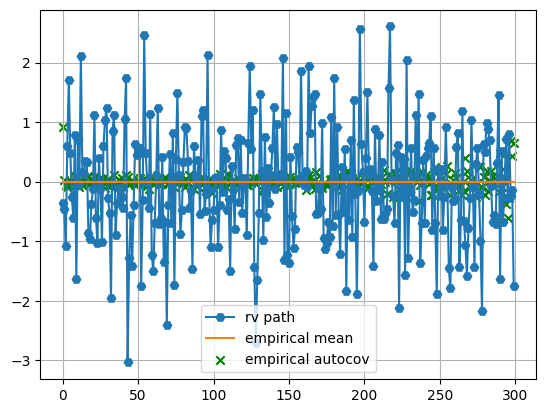

In [49]:
#This here is the white noise variable, defined in the first session TP
def white_nosie(number_var):
    return np.random.normal(mean,sigma, number_var)

#call the white noise function
X_WN = white_nosie(number_var=LENGHT)

#calculate the empirical autocovariance of the white noise for all points going from 0 to the indexes last element
empirical_autocovariance_WN = empirical_autocovariance(X_WN,taus=indexes,mean=0)

#Calculate the empirical mean of the white noise
empirical_mean_WN = empirical_mean(X_WN)

#Plotting the results
plt.grid()
plt.plot(indexes,X_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_WN), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_WN, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()

- For the random variable $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$ , we define the following function, that is conviniently called : 'sum_white_noise'

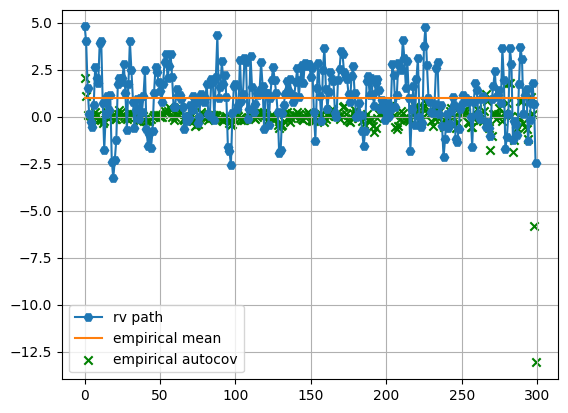

In [50]:
##This here is the second random Variable, defined in the first session TP
##X_t = a +bZ_t-1 + Z_t
def sum_white_noise(number_variable):
    X = white_nosie(number_variable)
    X_1 = white_nosie(number_var=1)
    X_rounded = np.roll(X,1)
    X_rounded = a + b*X + X_rounded
    X_rounded[0] = a + b*X[0] + X_1[0]  
    return X_rounded

#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=LENGHT)

#calculate the empirical autocovariance of the white noise for all points going from 0 to the indexes last element
empirical_mean_sum_WN = empirical_mean(X_sum_WN)

#Calculate the empirical autocovariance of the sum variable 
empirical_autocovariance_sum = empirical_autocovariance(X_sum_WN,mean=1,taus=indexes)

#Plotting the results
plt.grid()
plt.plot(indexes,X_sum_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_sum_WN), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_sum, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()


- For the random variable $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough") , we define the following function, that is conviniently called : 'geometric_white_noise'   (It is funnily called 'geometric' because it looks like one and it makes the code more readable)

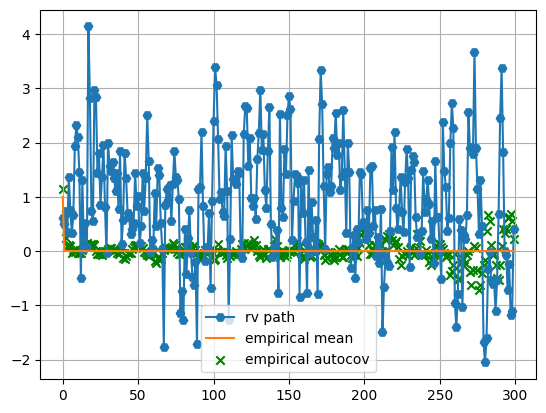

In [51]:
#This one computes the sum of the random variables multiplied by 2 to the power of the variable's indexc
def geometric_white_noise(number_variables):
    X = white_nosie(number_variables+K) # generate a white noise 
    summed_variables = np.zeros(number_variables) # generate array of zeros with the same size of random variable
    # Sum on all of the number of random varibales
    for j in range(number_variables):
        #This index is exactly the random variable defines in the last TP's question

        ##Fixed j => k and it should work now
        summed_variables[j] = np.sum(np.fromiter(((2**-k)*X[j-k+K] for k in range(K+1)),dtype=float))

    return summed_variables + a 

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=LENGHT)

#calculate the empirical autocovariance of the geometric sum white noise for all points going from 0 to the indexes last element
empirical_mean_geo_sum_WN = empirical_mean(X_sum_geometric_WN)

#Calculate the empirical autocovariance of the geometric sum variable 
empirical_autocovariance_geo_sum = empirical_autocovariance(X_sum_geometric_WN,mean=1,taus=indexes)

#Plotting the results 
plt.grid()
plt.plot(indexes,X_sum_geometric_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_autocovariance_geo_sum), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_geo_sum, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()

- For the random variable $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ , we define the following function, that is conviniently called : 'cos_noise'.

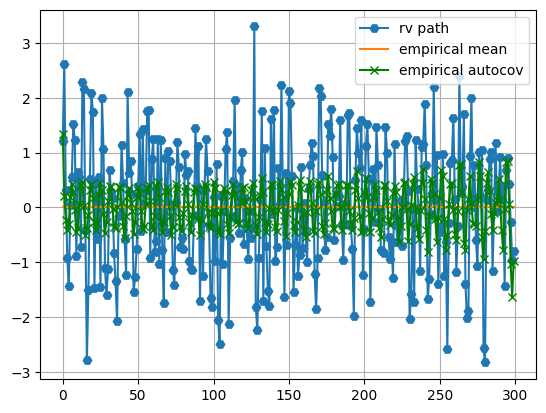

In [52]:
#This function defines the harmonic process in the exercise
def cos_noise(number_variables):
    T=np.arange(0,number_variables) # An array of the number of random variable
    PHI = np.random.uniform(0,2*np.pi)
    return A0*np.cos(lambda0*T+PHI)+np.random.normal(mean,sigma,number_variables) # returns the cos function

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=LENGHT)

#theoretical mean of the harmonic process
empirical_mean_cos_WN = empirical_mean(X_cos_WN)

#The empirical autocovariance of the harmonic process
empirical_autocovariance_cos = empirical_autocovariance(X_cos_WN,mean=0,taus=indexes)


#Plotting the results 
plt.grid()
plt.plot(indexes,X_cos_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_cos_WN), label='empirical mean')
plt.plot(indexes,empirical_autocovariance_cos, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()

#leave this here
X_1 = np.array([-0.10410915, -0.44924332, -2.61843838, -3.36720979, -1.42221284,
       -2.08056685,  0.37960208,  1.47726544,  1.92928295,  0.15941079,
        1.20205606,  2.14820092,  1.51930553,  1.81990484,  2.93049759,
       -0.39307242,  1.14744842, -0.59272112, -1.40455415, -2.45857744,
       -2.27611428, -2.25004623, -1.3921666 ,  0.84589513,  2.25790285,
        0.28957758,  3.33010206,  1.11746805,  1.85235982, -0.09030911,
        1.8208605 , -1.59980155, -1.94990181, -1.70779809, -1.6211652 ,
       -2.47429347,  0.94921705, -1.63316865, -1.15233311, -0.11006162,
        1.52157505,  1.41597969,  2.14140446,  1.88966599,  1.88174346,
        2.36365292,  0.53695846, -1.86502517, -1.50448436,  0.28210703,
       -1.29251419, -2.44137992, -3.35152552,  0.71450454, -1.03712348,
       -1.06981815,  3.61344294,  3.05944724,  1.51351806,  0.23025658,
        0.79267075, -0.25415893,  0.45854954, -0.99059372, -2.05253049,
       -2.54618136,  0.03027855, -3.33754887, -0.27604263, -0.42919592,
       -0.4488414 ,  1.63206019,  1.07941318,  0.40692884,  3.36448937,
        1.90357719,  0.86943475,  0.69897859, -0.77550041, -2.00892078,
       -2.46946127, -1.0708268 , -3.2429321 , -0.13725256, -1.12650786,
        0.95674449,  0.88022577,  0.68421259,  0.95278923,  0.98689236,
        1.78472537,  1.09954785,  0.78129668,  1.18912101, -0.15241077,
       -0.7334948 , -2.75488814, -1.88477398, -1.85846591, -1.66603608])

X_3 = np.array([-2.221699284612737, -2.2619607527980756, 0.8863395868722156, 0.9416629915733699, 0.9060587048049614, 0.047178747602189985, -1.9046693071830432, -0.04544001667653097, -1.6739810972325526, 0.7477673183509038, 0.019712056590573068, 
-1.0666849479652365, 2.2608333526768307, -2.1216126636741364, -1.3361793671487563, -1.6250812461749624, 0.38345548213031916, 0.1853331101864889, 1.9134143205350551, -2.5935779783322954, -0.21772357172297652, -0.6117971560180904, 0.8834092633811697, 1.7836614100163466, 0.1352494111227902, 0.24257142417943084, -2.535939049200371, -0.2916220418080609, -0.2593316801867618, 1.319495721523174, 2.6986329176022243, -0.2203428637011436, -1.128257386069082, -0.35898254087125603, 1.374284584440482, 2.424038340773007, 2.9496743213310763, 1.71266422021553, -3.1445173286061916, 0.16303660376145934, -0.7253973645600955, -0.3756643581034591, 1.3774947131103525, -1.8145268930510325, -1.0116317433470612, -1.7355212883003956, -1.0150021288970053, 0.06125349595939414, 1.070316181124858, 1.1501582035756384, 0.824125241782663, 0.11120739944980074, -0.436849345152262, -0.15051526137105567, 1.504243902627407, 0.42279737648882637, 
0.3245162641507766, -0.9431701657466955, 0.9306852378201175, 1.12864289129553, 1.2120727835481255, 1.4244479847493872, -0.37178295650439563, -1.7304336183955433, 0.4506223215618226, -2.149943504055063, 0.36371609623255063, 1.6379890160415151, 1.792120944105494, -0.34713292048984806, -1.2828365467097018, -0.1521539540652932, -1.319766360887162, 0.8515717131067492, 1.4503405452828395, -0.12375152682125372, -0.6436473580799795, -0.2983194785135893, -1.252881710026127, 0.8072482523286293, 2.2784687516906894, 0.19022342982365165, -0.945176891161141, 0.1321080291891369, -0.07109139011537696, 1.0779523310123507, -0.663195890421887, 0.10255068614284263, -0.14023821803929992, -1.679305556646931, 0.23400996420861175, -0.47944040011575034, 2.4759860660143653, 0.000318590947037678, 1.08009295726842, -1.9673782808941924, -0.2949412277787409, -0.7334302811971518, -0.27115121994240055, 1.2559387795224797])